 ## <center>Practicing Machine Learning</center>
### <center>Classification Exercise </center>
### <center>Titanic - Machine Learning from Disaster </center>
#### <center> Recommended Source: <a href="https://www.amazon.com/-/es/Aur%C3%A9lien-G%C3%A9ron/dp/1492032646/ref=sr_1_fkmr1_1?__mk_es_US=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=2Y7BISU0SQYCV&keywords=hand+son+machine+learning+tensorflow+keras&qid=1664596219&qu=eyJxc2MiOiIwLjkzIiwicXNhIjoiMC4wMCIsInFzcCI6IjAuMDAifQ%3D%3D&sprefix=hand+son+machine+learning+tensorflow+keras%2Caps%2C105&sr=8-1-fkmr1">Link</a></center>
#### <center> Kaggle Competition Page: <a href="https://www.kaggle.com/competitions/titanic/data">Link</a></center>


In [475]:
# !kaggle competitions download -c titanic -p ~/datasets/titanic

## Loading the Titanic Data

Above is the link to downloading the data I will now proceed to create dataframes from data!

In [476]:
import os
data_path = os.path.join(os.path.join(os.getcwd(),'datasets'), 'titanic')
data_path

'C:\\Users\\Usuario1\\Desktop\\Work\\ML Learning\\Machine Learning Topics Explanation\\Traditional ML\\Classification\\Exercises\\datasets\\titanic'

In [477]:
os.listdir(data_path)

['gender_submission.csv', 'solution.csv', 'test.csv', 'train.csv']

In [478]:
import pandas as pd
train_set = pd.read_csv(os.path.join(data_path, 'train.csv'))
train_set.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [479]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [480]:
train_set.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [481]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [482]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot: >

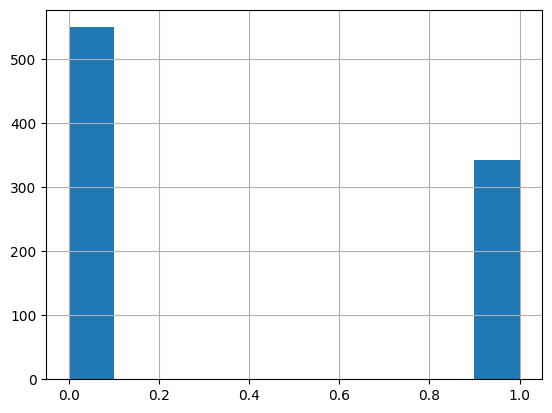

In [483]:
train_set.Survived.hist()

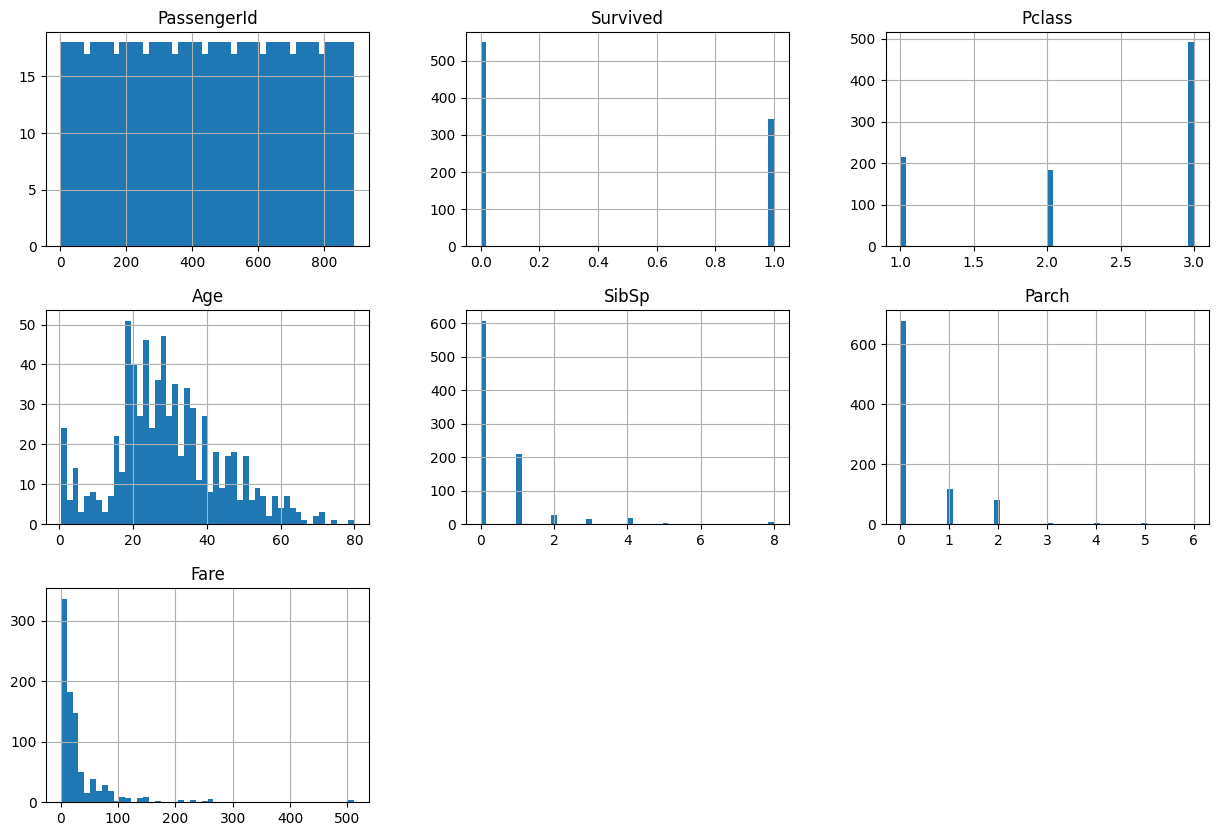

In [484]:
%matplotlib inline
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize=(15,10))
plt.show()

In [485]:
train_set.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [486]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1989)
independent_variables = [variable for variable in train_set.columns.tolist() if variable not in ["Cabin", "Age", "Name", "Ticket", "PassengerId", "Survived", "Embarked"]]

X = train_set.copy()[independent_variables]
y = train_set.Survived.copy()
X_resampled, y_resampled = X, y
X_resampled, y_resampled =  ros.fit_resample(X, y)
X_resampled.Pclass = X_resampled.Pclass.astype("category")
X_resampled.Sex = X_resampled.Sex.astype("category")


<AxesSubplot: >

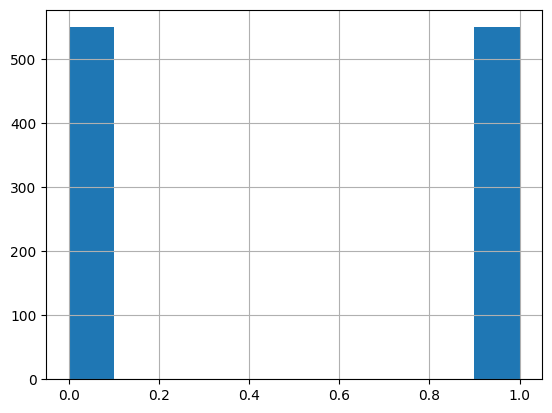

In [487]:
y_resampled.hist()

In [488]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('Scaler', StandardScaler())
])

full_pipeline = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, selector(dtype_exclude='category')),
        ('cat', OneHotEncoder(sparse=False), ['Pclass', 'Sex'])

])

X_transformed = full_pipeline.fit_transform(X_resampled)
print(pd.DataFrame(X_transformed))



             0         1         2    3    4    5    6    7
0     0.462671 -0.500626 -0.550354  0.0  0.0  1.0  0.0  1.0
1     0.462671 -0.500626  0.683433  1.0  0.0  0.0  1.0  0.0
2    -0.499475 -0.500626 -0.537349  0.0  0.0  1.0  1.0  0.0
3     0.462671 -0.500626  0.333079  1.0  0.0  0.0  1.0  0.0
4    -0.499475 -0.500626 -0.534940  0.0  0.0  1.0  0.0  1.0
...        ...       ...       ...  ...  ...  ...  ...  ...
1093 -0.499475 -0.500626 -0.102376  1.0  0.0  0.0  0.0  1.0
1094 -0.499475 -0.500626  0.976627  1.0  0.0  0.0  1.0  0.0
1095  0.462671 -0.500626 -0.379834  0.0  0.0  1.0  1.0  0.0
1096 -0.499475  1.964339  0.844642  1.0  0.0  0.0  1.0  0.0
1097 -0.499475 -0.500626 -0.439564  0.0  1.0  0.0  1.0  0.0

[1098 rows x 8 columns]


In [489]:
from sklearn.linear_model import LogisticRegression

logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_transformed, y_resampled)

LogisticRegression()

In [490]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
y_pred = cross_val_predict(logistic_reg_model, X_transformed, y_resampled, cv=8, method='predict')
log_reg_acc = logistic_reg_model.score(X_transformed, y_resampled)
log_reg_f1 = f1_score(y_resampled, y_pred)

In [491]:
from matplotlib import pyplot
importance = logistic_reg_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: -0.26322
Feature: 1, Score: -0.02034
Feature: 2, Score: 0.18238
Feature: 3, Score: 0.80123
Feature: 4, Score: 0.07966
Feature: 5, Score: -0.88073
Feature: 6, Score: 1.36622
Feature: 7, Score: -1.36606


In [492]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_transformed, y_resampled)

KNeighborsClassifier()

In [493]:
y_train_knn_pred = cross_val_predict(knn_clf, X_transformed, y_resampled, cv=8)
knn_acc = knn_clf.score(X_transformed, y_resampled)
knn_f1 = f1_score(y_resampled, y_train_knn_pred)

In [494]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=1989)
forest_model.fit(X_transformed, y_resampled)
y_forest = cross_val_predict(forest_model, X_transformed, y_resampled, cv=8, method='predict')
rf_acc = forest_model.score(X_transformed, y_resampled)
rf_f1 = f1_score(y_resampled, y_forest)

In [495]:


models = pd.DataFrame({
    'Model': [ 'Logistic Regression','KNN',
              'Random Forest'],
    'Accuracy Score': [log_reg_acc, knn_acc, rf_acc],
'F1 Score': [log_reg_f1, knn_f1, rf_f1]})
models.sort_values(by='F1 Score', ascending=False)


,Model,Accuracy Score,F1 Score
2,Random Forest,0.925319,0.844004
1,KNN,0.861566,0.821072
0,Logistic Regression,0.774135,0.767971


In [502]:
import pandas as pd
test_set = pd.read_csv(os.path.join(data_path, 'test.csv'))


In [497]:
test_set.Pclass = test_set.Pclass.astype("category")
test_set.Sex = test_set.Sex.astype("category")
test_set.Name = test_set.Name.astype("category")
X = test_set.copy()[independent_variables]

In [498]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Pclass  418 non-null    category
 1   Sex     418 non-null    category
 2   SibSp   418 non-null    int64   
 3   Parch   418 non-null    int64   
 4   Fare    417 non-null    float64 
dtypes: category(2), float64(1), int64(2)
memory usage: 11.0 KB


In [499]:

print(X.columns)
X_test = full_pipeline.fit_transform(X)

print(pd.DataFrame(X_test))

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare'], dtype='object')
            0         1         2    3    4    5    6    7
0   -0.499470 -0.400248 -0.497063  0.0  0.0  1.0  0.0  1.0
1    0.616992 -0.400248 -0.511926  0.0  0.0  1.0  1.0  0.0
2   -0.499470 -0.400248 -0.463754  0.0  1.0  0.0  0.0  1.0
3   -0.499470 -0.400248 -0.482127  0.0  0.0  1.0  0.0  1.0
4    0.616992  0.619896 -0.417151  0.0  0.0  1.0  1.0  0.0
..        ...       ...       ...  ...  ...  ...  ...  ...
413 -0.499470 -0.400248 -0.493105  0.0  0.0  1.0  0.0  1.0
414 -0.499470 -0.400248  1.314557  1.0  0.0  0.0  1.0  0.0
415 -0.499470 -0.400248 -0.507445  0.0  0.0  1.0  0.0  1.0
416 -0.499470 -0.400248 -0.493105  0.0  0.0  1.0  0.0  1.0
417  0.616992  0.619896 -0.236640  0.0  0.0  1.0  0.0  1.0

[418 rows x 8 columns]


In [500]:
solution_path = os.path.join(data_path, 'solution.csv')

y_preds = forest_model.predict(X_test)

In [501]:
solution_df = pd.DataFrame(y_preds, columns=['Survived'])
solution_df['PassengerId'] = test_set.PassengerId
solution_df.info()
solution_df['PassengerId'] = solution_df['PassengerId'].astype(int)
solution_df.to_csv(solution_path, index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Survived     418 non-null    int64
 1   PassengerId  418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
